In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_csv('cardata.csv')
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.dtypes[df.dtypes == 'object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [6]:
strings = list(df.dtypes[df.dtypes == 'object'].index)

In [7]:
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [8]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [9]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [10]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

<Axes: xlabel='msrp', ylabel='Count'>

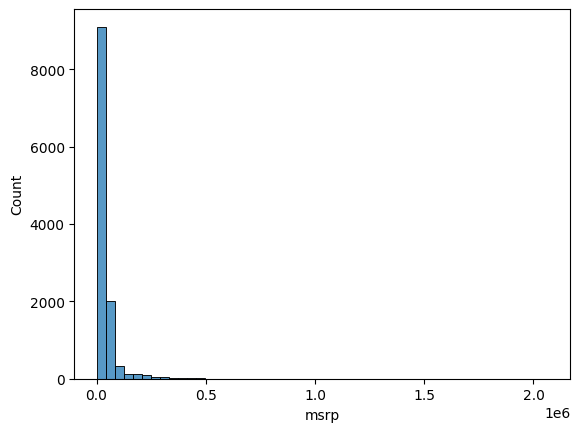

In [11]:
sns.histplot(df.msrp, bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

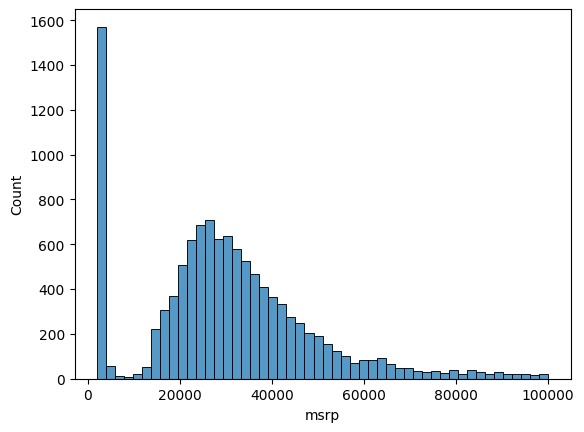

In [12]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

In [13]:
pricecompact = np.log1p(df.msrp)

In [14]:
pricecompact

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<Axes: xlabel='msrp', ylabel='Count'>

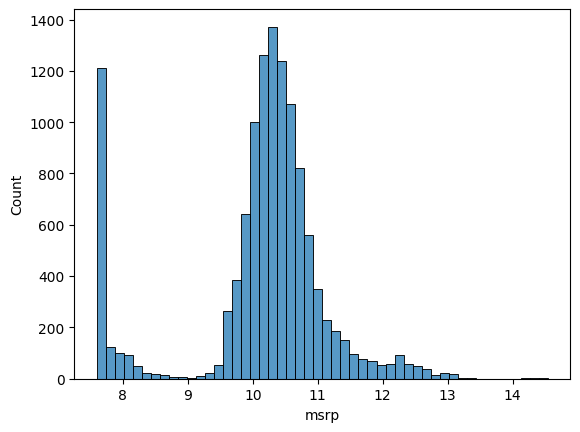

In [15]:
sns.histplot(pricecompact, bins=50)

In [16]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [17]:
n = int(len(df))
n_val = int(len(df) * 0.2)
n_test = int(len(df) * 0.2)
n_train = n - n_val - n_test

In [18]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [19]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_test]
df_test = df.iloc[n_train+n_test:]

In [20]:
idx = np.arange(n)

In [21]:
np.random.seed(2)
np.random.shuffle(idx)

In [22]:
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336], shape=(11914,))

In [23]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_test]]
df_test = df.iloc[idx[n_train+n_test:]]

In [24]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [25]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [26]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [27]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [28]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [29]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [30]:
xi = [453, 11, 86]
xin = [1, 453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [31]:
def linear_regression(xi):
    n = len(xi)

    pred = w0
    
    for j in range(n):
        pred = pred + w[j] * xi[j]
        
    return pred

In [32]:
linear_regression(xi)

12.312

In [33]:
np.expm1(12.312)

np.float64(222347.2221101062)

In [34]:
Xn = np.array(xin) 
Xn.dot(w_new)

np.float64(12.312)

In [35]:
def train_regression(X, y):
    pass

In [36]:
x1 = [1, 453, 11, 86]
x2 = [1, 45, 19, 254]
x3 = [1, 235, 56, 76]
X = [x1, x2, x3]

X = [ 
      [453, 11, 86], 
      [45, 19, 254], 
      [235, 56, 76], 
      [87, 11, 345], 
      [67, 19, 254], 
      [12, 56, 76], 
      [568, 11, 86], 
      [45, 19, 234], 
      [235, 24, 76]
    ]
X = np.array(X)

In [37]:
X

array([[453,  11,  86],
       [ 45,  19, 254],
       [235,  56,  76],
       [ 87,  11, 345],
       [ 67,  19, 254],
       [ 12,  56,  76],
       [568,  11,  86],
       [ 45,  19, 234],
       [235,  24,  76]])

In [38]:
ones = np.ones(X.shape[0])
X = np.column_stack([ones, X])

In [39]:
y = [120, 240, 569, 67, 120, 240, 569, 67, 210]

In [40]:
XTX = X.T.dot(X)

In [41]:
XTX_inv = np.linalg.inv(XTX)

In [42]:
XTX_inv

array([[ 7.67198839e+00, -9.45409604e-03, -9.75529317e-02,
        -1.98282630e-02],
       [-9.45409604e-03,  1.36928039e-05,  1.13905433e-04,
         2.38217271e-05],
       [-9.75529317e-02,  1.13905433e-04,  1.43895579e-03,
         2.37914987e-04],
       [-1.98282630e-02,  2.38217271e-05,  2.37914987e-04,
         5.58634991e-05]])

In [43]:
w = XTX_inv.dot(X.T).dot(y)

In [44]:
w

array([-502.04351144,    1.2415709 ,   12.11745244,    1.21911432])

In [45]:
def train_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [46]:
train_regression(X, y)

LinAlgError: Singular matrix

In [47]:
base = df_train.dtypes != 'object'

In [48]:
base = ['engine_hp', 'engine_cylinders', 'number_of_doors', 'highway_mpg', 'city_mpg', 'popularity']

In [49]:
df_train[base]

,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity
0,148.0,4.0,2.0,33,24,1385
1,132.0,4.0,4.0,32,25,2031
2,148.0,4.0,4.0,37,28,640
3,90.0,4.0,3.0,18,16,873
4,385.0,8.0,4.0,21,15,5657
...,...,...,...,...,...,...
7145,300.0,6.0,2.0,31,20,3916
7146,210.0,4.0,2.0,30,24,873
7147,285.0,6.0,4.0,22,17,549
7148,563.0,12.0,4.0,21,13,86


In [50]:
X_trains = df_train[base].fillna(df_train[base].mean(numeric_only=True)).values

In [51]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978], shape=(7150,))

In [52]:
w0, w = train_regression(X_trains, y_train)

In [53]:
y_predt = w0 + X_trains.dot(w)

In [54]:
y_predt

array([ 9.22729883,  9.43795376,  9.67775594, ..., 10.42957534,
       12.07391054, 10.08711498], shape=(7150,))

<Axes: ylabel='Count'>

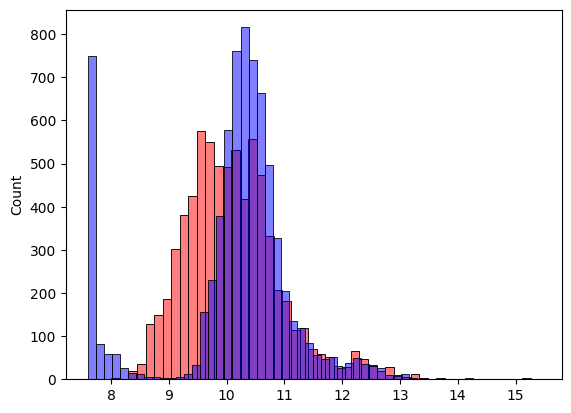

In [55]:
sns.histplot(y_predt, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [56]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [57]:
rmse(y_train, y_predt)

np.float64(0.7386666171215832)

In [58]:
def prepare_data(df):
    x = df[base].fillna(df[base].mean(numeric_only=True)).values
    return x

In [59]:
x_val = prepare_data(df_val)
y_predv = w0 + x_val.dot(w)

rmse(y_val, y_predv)

np.float64(0.7350989736480505)

In [60]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2,3,4]:
        df['num_of_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_of_doors_%s' % v)

    df_num = df[features]
    df_num = df_num.fillna(0)

    X = df_num.values

    return X

In [61]:
X_train = prepare_X(df_train)
w0, w = train_regression(X_train, y_train)
y_predt = w0 + X_train.dot(w)
rmse(y_train, y_predt)

np.float64(6.631413637156698)

In [62]:
car_make = list(df.make.value_counts().head().index)

In [63]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2,3,4]:
        df['num_of_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_of_doors_%s' % v)

    for v in car_make:
        df['car_make_%s' % v] = (df.make == v).astype('int')
        features.append('car_make_%s' % v)

    df_num = df[features]
    df_num = df_num.fillna(0)

    X = df_num.values

    return X

In [64]:
X_train = prepare_X(df_train)
w0, w = train_regression(X_train, y_train)
y_predt = w0 + X_train.dot(w)
rmse(y_train, y_predt)

np.float64(5.813585786987721)

In [65]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [66]:
categorical_variables = ['make', 'model', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size',
                         'vehicle_style']

In [67]:
categories = {}

for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)

In [68]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'model': ['silverado_1500',
  'tundra',
  'f-150',
  'sierra_1500',
  'beetle_convertible'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [69]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2,3,4]:
        df['num_of_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_of_doors_%s' % v)
        
    for c, values in categories.items():
        for v in values:
            df['%s_%s' % (c,v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c,v))

    df_num = df[features]
    df_num = df_num.fillna(0)

    X = df_num.values

    return X

In [70]:
X_train = prepare_X(df_train)
w0, w = train_regression(X_train, y_train)
y_predt = w0 + X_train.dot(w)
rmse(y_train, y_predt)

np.float64(33.0284484523495)

In [71]:
w0, w

(np.float64(-2623599363248820.5),
 array([-1.35655981e-01,  1.01954442e+01, -3.73376506e+14,  1.14490857e+00,
        -2.08236213e+00,  2.04982984e-03,  1.31083921e-01,  7.46753011e+14,
         1.12012952e+15,  1.49350602e+15,  3.05313142e-01, -9.54681851e+00,
        -6.38626965e+00,  1.10534607e+01,  1.54325721e+00,  6.71815672e+00,
        -1.15223758e+01,  6.98987520e+00,  4.67504217e+00,  1.10543257e+01,
        -2.03466308e+01, -4.54745273e-01, -2.08534583e+00, -7.64198304e+00,
        -6.08191885e+01,  3.81151110e+15,  3.81151110e+15,  3.81151110e+15,
         3.81151110e+15,  3.81151110e+15, -1.18791174e+15, -1.18791174e+15,
        -1.18791174e+15, -1.18791174e+15,  2.24948738e+01,  1.59928678e+00,
        -1.13445257e+00, -1.25154317e+00, -2.08339171e+00, -6.45774332e+01,
        -6.10653636e+01, -5.60294481e+01, -8.44316325e-02,  6.13911333e-03,
         1.76928471e-01,  3.74550688e-01, -1.96367745e-01]))

In [73]:
def train_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [74]:
X_train = prepare_X(df_train)
w0, w = train_regression_reg(X_train, y_train, r=0.01)
y_predt = w0 + X_train.dot(w)
rmse(y_train, y_predt)

np.float64(0.45481306530295196)

In [76]:
X_val = prepare_X(df_val)
w0, w = train_regression_reg(X_val, y_val, r=0.01)
y_predt = w0 + X_val.dot(w)
rmse(y_val, y_predt)

np.float64(0.44336859257630457)

In [77]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]:
    X_val = prepare_X(df_val)
    w0, w = train_regression_reg(X_val, y_val, r=r)
    y_predt = w0 + X_val.dot(w)
    score = rmse(y_val, y_predt)

    print(r, w0, score)

0.0 -1.3241052331238578e+16 27.871339848098582
1e-05 3.0056908179056774 0.44336848422069736
0.0001 2.1350424552187808 0.4433684842312131
0.001 2.136292194004447 0.44336848530775314
0.01 2.13531726571271 0.44336859257630457
0.1 2.125597608313476 0.4433789512377759
1 2.03993778290541 0.4441436917607662
10 1.6323888094969152 0.46223687101653754


In [79]:
df_full_train = pd.concat([df_train, df_val]).reset_index(drop=True)

In [80]:
X_full_train = prepare_X(df_full_train)

In [84]:
y_full_train = np.concatenate([y_train, y_val])

In [85]:
w0, w = train_regression_reg(X_full_train, y_full_train, r=0.001)

In [86]:
w0

np.float64(6.327777191743777)

In [87]:
X_test = prepare_X(df_test)
w0, w = train_regression_reg(X_full_train, y_full_train, r=0.001)
y_predte = w0 + X_test.dot(w)
score = rmse(y_test, y_predte)
score

np.float64(0.44743049076883834)

In [89]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [92]:
df_small = pd.DataFrame([car])

In [93]:
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [96]:
X_car = prepare_X(df_small)
y_predcar = w0 + X_car.dot(w)

In [97]:
y_predcar

array([10.6153494])

In [98]:
np.expm1(y_predcar)

array([40754.63542803])

In [103]:
np.expm1(y_test[20])

np.float64(35000.00000000001)